In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

Dados + El Ninõ

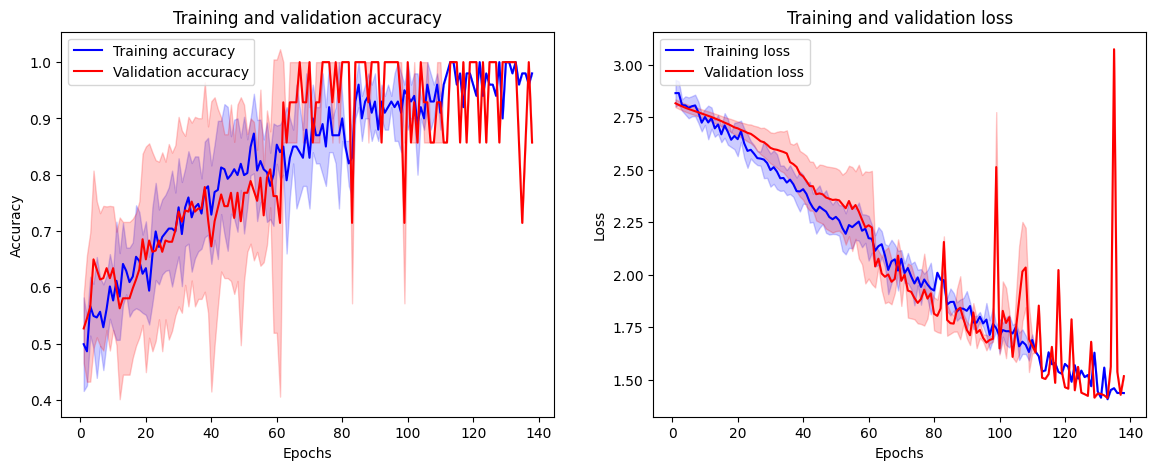

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def pad_sequences(seq_list, pad_value=np.nan):
    max_length = max(len(seq) for seq in seq_list)
    padded_seqs = np.full((len(seq_list), max_length), pad_value)
    for i, seq in enumerate(seq_list):
        padded_seqs[i, :len(seq)] = seq
    return padded_seqs

def plot_history_from_files(num_folds, filename):
    all_acc = []
    all_val_acc = []
    all_loss = []
    all_val_loss = []

    for i in range(num_folds):
        with open(f'history_fold_Fpar_{i}.pkl', 'rb') as f:
            history = pickle.load(f)
            all_acc.append(history['accuracy'])
            all_val_acc.append(history['val_accuracy'])
            all_loss.append(history['loss'])
            all_val_loss.append(history['val_loss'])

    all_acc = pad_sequences(all_acc)
    all_val_acc = pad_sequences(all_val_acc)
    all_loss = pad_sequences(all_loss)
    all_val_loss = pad_sequences(all_val_loss)

    mean_acc = np.nanmean(all_acc, axis=0)
    mean_val_acc = np.nanmean(all_val_acc, axis=0)
    mean_loss = np.nanmean(all_loss, axis=0)
    mean_val_loss = np.nanmean(all_val_loss, axis=0)

    std_acc = np.nanstd(all_acc, axis=0)
    std_val_acc = np.nanstd(all_val_acc, axis=0)
    std_loss = np.nanstd(all_loss, axis=0)
    std_val_loss = np.nanstd(all_val_loss, axis=0)

    epochs = range(1, len(mean_acc) + 1)

    plt.figure(figsize=(14, 5))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, mean_acc, 'b-', label='Training accuracy')
    plt.fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, color='b', alpha=0.2)
    plt.plot(epochs, mean_val_acc, 'r-', label='Validation accuracy')
    plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc, color='r', alpha=0.2)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, mean_loss, 'b-', label='Training loss')
    plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color='b', alpha=0.2)
    plt.plot(epochs, mean_val_loss, 'r-', label='Validation loss')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='r', alpha=0.2)
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    plt.savefig(filename)
    plt.show()


plot_history_from_files(num_folds=8, filename='training_validation_accuracy_loss_from_files.png')


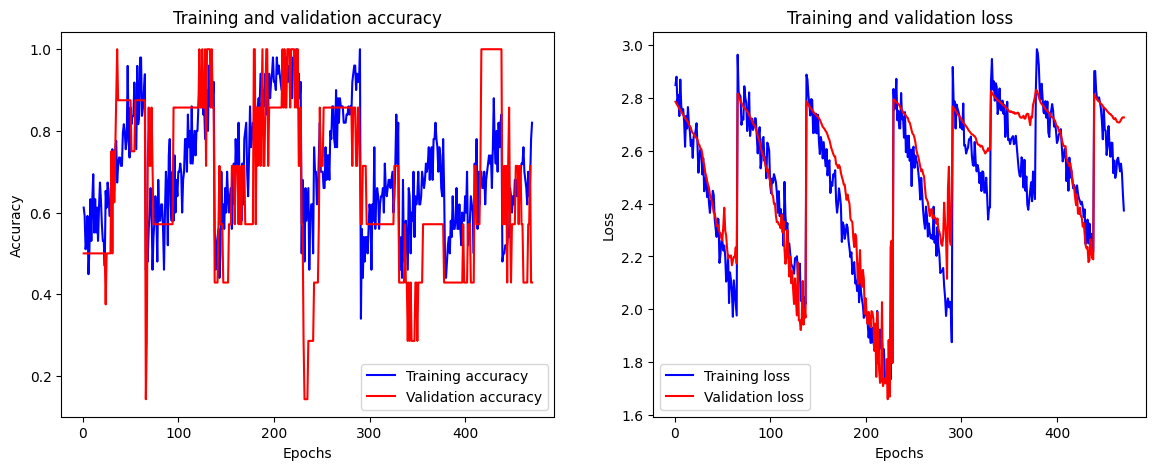

In [ ]:
def plot_history_from_files(num_folds, filename):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for i in range(num_folds):
        with open(f'history_fold_LAI_{i}.pkl', 'rb') as f:
            history = pickle.load(f)
            acc.extend(history['accuracy'])
            val_acc.extend(history['val_accuracy'])
            loss.extend(history['loss'])
            val_loss.extend(history['val_loss'])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


plot_history_from_files(num_folds=8, filename='training_validation_accuracy_loss_from_files.png')

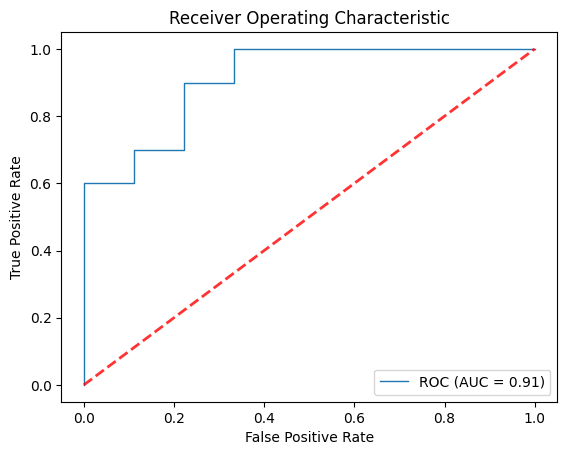

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve_from_files(num_folds, filename):

    with open(f'roc_data_Fpar.pkl', 'rb') as f:
          data = pickle.load(f)
          roc_data = data

    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    plt.figure()

    fpr = roc_data['fpr']
    tpr = roc_data['tpr']
    roc_auc = roc_data['roc_auc']
    plt.plot(fpr, tpr, lw=1, label=f'ROC (AUC = {roc_auc:.2f})')

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig(filename)
    plt.show()

plot_roc_curve_from_files(num_folds=8, filename='roc_curve.png')


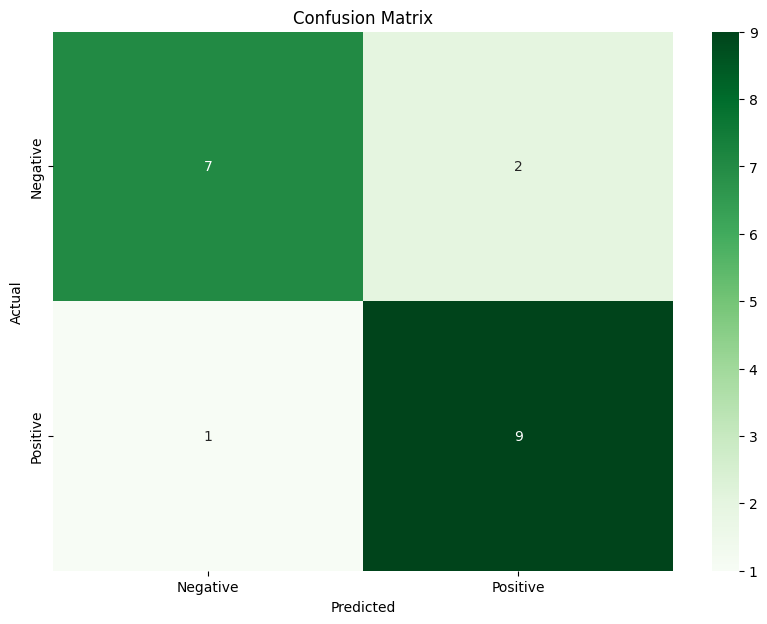

In [ ]:
def plot_confusion_matrix_from_general_files(filename):
    with open('confusion_matrix_Fpar.pkl', 'rb') as f:
        cm = pickle.load(f)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(filename)
    plt.show()


plot_confusion_matrix_from_general_files(filename='confusion_matrix.png')

In [ ]:
import plotly.graph_objects as go
import pandas as pd


data = {
    'Modelo': ['Custom', 'EfficientNetB0', 'Xception'],
    'Precipitação': [[0.772, 0.157], [0.544, 0.112], [0.544, 0.087]],
    'LSTDay': [[0.752, 0.186], [0.508, 0.066], [0.491, 0.066]],
    'NDVI': [[0.593, 0.137], [0.526, 0.061], [0.508, 0.066]],
    'FPAR': [[0.526, 0.138], [0.508, 0.066], [0.455, 0.049]],
    'EVI': [[0.555, 0.185], [0.508, 0.120], [0.473, 0.061]],
    'LAI': [[0.542, 0.173], [0.491, 0.066], [0.508, 0.097]]
}


df = pd.DataFrame(data)


colors = [
    'rgba(0, 100, 0, 0.8)',  # Precip
    'rgba(34, 139, 34, 0.8)',  # LSTDay
    'rgba(50, 205, 50, 0.8)',  # NDVI
    'rgba(144, 238, 144, 0.8)',  # FPAR
    'rgba(152, 251, 152, 0.8)',  # EVI
    'rgba(0, 255, 127, 0.8)'  # LAI
]


fig = go.Figure()


for i, col in enumerate(df.columns[1:]):
    fig.add_trace(go.Bar(
        x=df['Modelo'],
        y=df[col].apply(lambda x: x[0]),
        name=f'{col} - Mean',
        error_y=dict(type='data', array=df[col].apply(lambda x: x[1])),
        marker_color=colors[i],
        text=df[col].apply(lambda x: f'{x[0]:.3f}'),
        textposition='inside'
    ))


fig.update_layout(
    title='Acurácia Média e Desvio Padrão de Validação dos Modelos',
    xaxis_title='Model',
    yaxis_title='Acurácia Média',
    barmode='group',
    template='plotly_white'
)


fig.show()



AttributeError: 'Figure' object has no attribute 'save'

In [ ]:
import plotly.graph_objects as go
import pandas as pd


data = {
    'Modelo': ['Custom', 'EfficientNetB0', 'Xception'],
    'LSTDay + Precipitação': [[0.839, 0.166], [0.491, 0.066], [0.629, 0.145]],
    'NDVI + Precipitação': [[0.754, 0.117], [0.491, 0.066], [0.473, 0.094]],
    'FPAR + Precipitação': [[0.859, 0.142], [0.491, 0.066], [None, None]],
    'EVI + Precipitação': [[0.772, 0.157], [0.508, 0.066], [0.419, 0.135]],
    'LAI + Precipitação': [[0.787, 0.215], [0.491, 0.066], [None, None]]
}


df = pd.DataFrame(data)

colors = [
    'rgba(0, 100, 0, 0.8)',  # Precip
    'rgba(34, 139, 34, 0.8)',  # LSTDay
    'rgba(50, 205, 50, 0.8)',  # NDVI
    'rgba(144, 238, 144, 0.8)',  # FPAR
    'rgba(152, 251, 152, 0.8)',  # EVI
    'rgba(0, 255, 127, 0.8)'  # LAI
]


fig = go.Figure()


for i, col in enumerate(df.columns[1:]):
    fig.add_trace(go.Bar(
        x=df['Modelo'],
        y=df[col].apply(lambda x: x[0] if x[0] is not None else 0),
        name=f'{col} - Mean',
        error_y=dict(type='data', array=df[col].apply(lambda x: x[1] if x[1] is not None else 0)),
        marker_color=colors[i],
        text=df[col].apply(lambda x: f'{x[0]:.3f}' if x[0] is not None else ''),
        textposition='inside'
    ))


fig.update_layout(
    title='Acurácia Média e Desvio Padrão de Validação dos Modelos',
    xaxis_title='Model',
    yaxis_title='Acurácia Média',
    barmode='group',
    template='plotly_white'
)


fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd


data = {
    'Modelo': ['Custom', 'Custom + Dados El Niño'],
    'LSTDay + Precipitação + FPAR': [[0.823, 0.171], [0.825, 0.090]],
    'NDVI + Precipitação + FPAR': [[0.772, 0.187], [0.805, 0.159]],
    'EVI + Precipitação + FPAR': [[0.823, 0.171], [0.825, 0.135]],
    'LAI + Precipitação + FPAR': [[0.805, 0.159], [0.843, 0.147]],
    'Precipitação + FPAR':[[None, None], [0.823, 0.171]]
}


df = pd.DataFrame(data)


colors = [
    'rgba(0, 100, 0, 0.8)',  # Precip
    'rgba(34, 139, 34, 0.8)',  # LSTDay
    'rgba(50, 205, 50, 0.8)',  # NDVI
    'rgba(144, 238, 144, 0.8)',  # FPAR
    'rgba(152, 251, 152, 0.8)',  # EVI
    'rgba(0, 255, 127, 0.8)'  # LAI
]

fig = go.Figure()


for i, col in enumerate(df.columns[1:]):
    fig.add_trace(go.Bar(
        x=df['Modelo'],
        y=df[col].apply(lambda x: x[0] if x[0] is not None else 0),
        name=f'{col} - Mean',
        error_y=dict(type='data', array=df[col].apply(lambda x: x[1] if x[1] is not None else 0)),
        marker_color=colors[i],
        text=df[col].apply(lambda x: f'{x[0]:.3f}' if x[0] is not None else ''),
        textposition='inside'
    ))


fig.update_layout(
    title='Acurácia Média e Desvio Padrão de Validação dos Modelos',
    xaxis_title='Model',
    yaxis_title='Acurácia Média',
    barmode='group',
    template='plotly_white'
)


fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

data = {
    'Model': ['Custom', 'EfficientNetB0', 'Xception'],
    'Precipitação': [[0.73, 0.67, 0.68], [0.74, 0.74, 0.74], [0.77, 0.47, 0.58]],
    'LSTDay': [[0.83, 0.72, 0.74], [0.77, 0.47, 0.58], [0.74, 0.74, 0.74]],
    'NDVI': [[0.77, 0.73, 0.74], [0.86, 0.77, 0.79], [0.70, 0.68, 0.68]],
    'FPAR': [[0.74, 0.74, 0.74], [0.79, 0.55, 0.63], [0.79, 0.58, 0.63]],
    'EVI': [[0.82, 0.71, 0.74], [0.77, 0.73, 0.74], [0.74, 0.74, 0.74]],
    'LAI': [[0.80, 0.64, 0.68], [0.58, 0.58, 0.58], [0.73, 0.67, 0.68]]
}


df = pd.DataFrame(data)


metrics = ['Precision', 'F1-Score', 'Accuracy']
variables = ['Precipitação', 'LSTDay', 'NDVI', 'FPAR', 'EVI', 'LAI']


fig = make_subplots(rows=1, cols=3, subplot_titles=df['Model'], shared_yaxes=True)


for i, model in enumerate(df['Model']):
    for j, metric in enumerate(metrics):
        fig.add_trace(go.Bar(
            x=variables,
            y=[df[var][i][j] if df[var][i][j] is not None else 0 for var in variables],
            name=f'{metric}',
            marker_color=['rgba(0, 100, 0, 0.8)', 'rgba(34, 139, 34, 0.8)', 'rgba(50, 205, 50, 0.8)'][j],
            text=[df[var][i][j] if df[var][i][j] is not None else '' for var in variables],
            textposition='auto',
            showlegend=(i == 0)
        ), row=1, col=i+1)


fig.update_layout(
    title='Métricas de Performance da Predição do Conjunto Teste',
    xaxis_title='Bandas',
    yaxis_title='Valor Médio',
    barmode='group',
    height=600,
    legend_title='Métricas',
    showlegend=True,
    template='plotly_white'
)


fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots


data = {
    'Model': ['Custom', 'EfficientNetB0', 'Xception'],
    'LSTDay + Precipitação': [[0.85, 0.84, 0.84], [0.65, 0.63, 0.63], [0.79, 0.79, 0.79]],
    'NDVI + Precipitação': [[0.80, 0.78, 0.79], [0.52, 0.52, 0.53], [0.69, 0.68, 0.68]],
    'FPAR + Precipitação': [[0.85, 0.84, 0.84], [0.77, 0.47, 0.58], [None, None, None]],
    'EVI + Precipitação': [[0.88, 0.84, 0.84], [0.76, 0.72, 0.74], [0.72, 0.67, 0.68]],
    'LAI + Precipitação': [[0.85, 0.84, 0.84], [0.63, 0.63, 0.63], [None, None, None]]
}


df = pd.DataFrame(data)


metrics = ['Precision', 'F1-Score', 'Accuracy']
variables = ['LSTDay + Precipitação', 'NDVI + Precipitação', 'FPAR + Precipitação', 'EVI + Precipitação', 'LAI + Precipitação']


fig = make_subplots(rows=1, cols=3, subplot_titles=df['Model'], shared_yaxes=True)


for i, model in enumerate(df['Model']):
    for j, metric in enumerate(metrics):
        fig.add_trace(go.Bar(
            x=variables,
            y=[df[var][i][j] if df[var][i][j] is not None else 0 for var in variables],
            name=f'{metric}',
            marker_color=['rgba(0, 100, 0, 0.8)', 'rgba(34, 139, 34, 0.8)', 'rgba(50, 205, 50, 0.8)'][j],
            text=[df[var][i][j] if df[var][i][j] is not None else '' for var in variables],
            textposition='auto',
            showlegend=(i == 0)
        ), row=1, col=i+1)

fig.update_layout(
    title='Métricas de Performance da Predição do Conjunto Teste',
    xaxis_title='Bandas',
    yaxis_title='Valor Médio',
    barmode='group',
    height=600,
    legend_title='Métricas',
    showlegend=True,
    template='plotly_white'
)


fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots


data1 = {
    'Model': ['Custom'],
    'LSTDay + Precipitação + FPAR': [[0.70, 0.68, 0.78]],
    'NDVI + Precipitação + FPAR': [[0.89, 0.89, 0.89]],
    'EVI + Precipitação + FPAR': [[0.85, 0.78, 0.79]],
    'LAI + Precipitação + FPAR': [[0.85, 0.84, 0.84]]
}

data2 = {
    'Model': ['Custom + Dados El Niño'],
    'LSTDay + Precipitação + FPAR': [[0.88, 0.84, 0.84]],
    'NDVI + Precipitação + FPAR': [[0.91, 0.89, 0.89]],
    'EVI + Precipitação + FPAR': [[0.85, 0.84, 0.84]],
    'LAI + Precipitação + FPAR': [[0.91, 0.89, 0.89]],
    'Precipitação + FPAR': [[0.85, 0.84, 0.84]]
}


df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)


metrics = ['Precision', 'F1-Score', 'Accuracy']
variables1 = ['LSTDay + Precipitação + FPAR', 'NDVI + Precipitação + FPAR', 'EVI + Precipitação + FPAR', 'LAI + Precipitação + FPAR']
variables2 = ['LSTDay + Precipitação + FPAR', 'NDVI + Precipitação + FPAR', 'EVI + Precipitação + FPAR', 'LAI + Precipitação + FPAR', 'Precipitação + FPAR']


fig = make_subplots(rows=1, cols=2, subplot_titles=('Custom', 'Custom + Dados El Niño'), shared_yaxes=True)


for j, metric in enumerate(metrics):
    fig.add_trace(go.Bar(
        x=variables1,
        y=[df1[var][0][j] for var in variables1],
        name=f'{metric}',
        marker_color=['rgba(0, 100, 0, 0.8)', 'rgba(34, 139, 34, 0.8)', 'rgba(50, 205, 50, 0.8)'][j],
        text=[df1[var][0][j] for var in variables1],
        textposition='auto'
    ), row=1, col=1)

for j, metric in enumerate(metrics):
    fig.add_trace(go.Bar(
        x=variables2,
        y=[df2[var][0][j] for var in variables2],
        name=f'{metric}',
        marker_color=['rgba(0, 100, 0, 0.8)', 'rgba(34, 139, 34, 0.8)', 'rgba(50, 205, 50, 0.8)'][j],
        text=[df2[var][0][j] for var in variables2],
        textposition='auto',
        showlegend=(i == 0)
    ), row=1, col=2)

fig.update_layout(
    title='Métricas de Performance da Predição do Conjunto Teste',
    xaxis_title='Bandas',
    yaxis_title='Valor Médio',
    barmode='group',
    height=600,
    legend_title='Métricas',
    showlegend=True,
    template='plotly_white'
)

fig.show()
